In [1]:
from pyVHR.analysis.pipeline import Pipeline
from realtime_pipeline import Realtime_Pipeline
import matplotlib.pyplot as plt

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


### Execution Time Comparison

Redetecing


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Tracking
Lost Face
Redetecing
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking


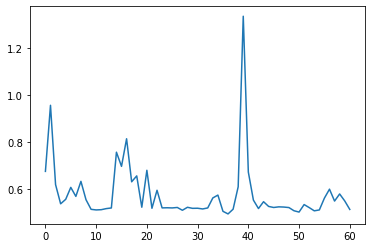

mean_execution_time: 0.5783568405714191


In [2]:
import statistics
realtime_pipe = Realtime_Pipeline()
holistic_skin_extraction_execution_times = realtime_pipe.run_realtime_pipeline(is_test=True, output='skin_extraction_execution_times', advanced_skin_extraction=True)
plt.figure()
plt.plot(holistic_skin_extraction_execution_times)
plt.show()
print('mean_execution_time:', statistics.mean(holistic_skin_extraction_execution_times))

Redetecing
Tracking
Lost Face
Redetecing
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking


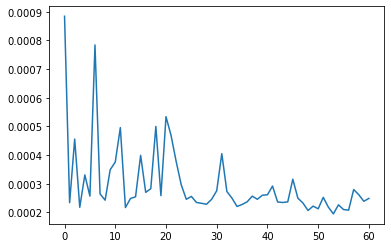

mean_execution_time: 0.00029746039969022155


In [3]:
basic_skin_extraction_execution_times = realtime_pipe.run_realtime_pipeline(is_test=True, output='skin_extraction_execution_times', advanced_skin_extraction=False)
plt.figure()
plt.plot(basic_skin_extraction_execution_times)
plt.show()
print('mean_execution_time:', statistics.mean(basic_skin_extraction_execution_times))

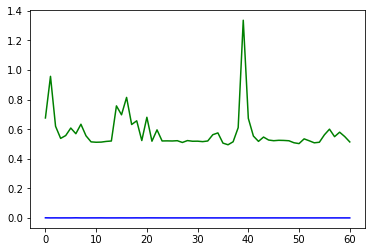

In [4]:
plt.plot(basic_skin_extraction_execution_times, 'b')
plt.plot(holistic_skin_extraction_execution_times, 'g')
plt.show()

### Skin Extraction Pixels Comparison (RGB Signal)

Redetecing
Tracking
Lost Face
Redetecing
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Redetecing
Tracking
Lost Face
Redetecing
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking
Tracking


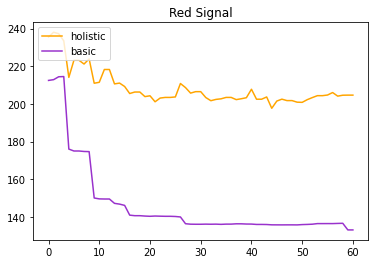

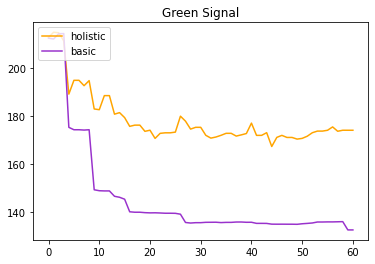

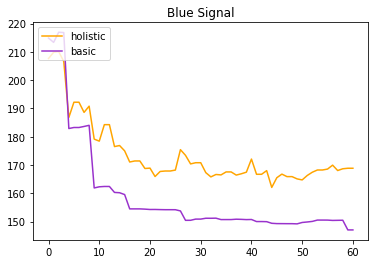

In [5]:
realtime_pipe = Realtime_Pipeline()
holistic_RGB_signal = realtime_pipe.run_realtime_pipeline(is_test=True, output='mean_colors', advanced_skin_extraction=True)
basic_RGB_signal = realtime_pipe.run_realtime_pipeline(is_test=True, output='mean_colors', advanced_skin_extraction=False)
R_holistic = [x[0] for x in holistic_RGB_signal]
G_holistic = [x[1] for x in holistic_RGB_signal]
B_holistic= [x[2] for x in holistic_RGB_signal]
R_basic = [x[0] for x in basic_RGB_signal]
G_basic = [x[1] for x in basic_RGB_signal]
B_basic= [x[2] for x in basic_RGB_signal]

plt.figure()
plt.plot(R_holistic, 'orange', label='holistic')
plt.plot(R_basic, 'darkorchid', label='basic')
plt.title('Red Signal')
plt.legend(loc="upper left")
plt.show()

plt.plot(G_holistic, 'orange', label='holistic')
plt.plot(G_basic, 'darkorchid', label='basic')
plt.title('Green Signal')
plt.legend(loc="upper left")
plt.show()

plt.plot(B_holistic, 'orange', label='holistic')
plt.plot(B_basic, 'darkorchid', label='basic')
plt.title('Blue Signal')
plt.legend(loc="upper left")
plt.show()

delta_e_mean 66.82998399389152


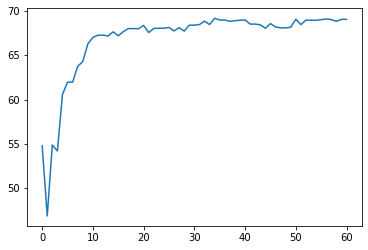

In [11]:
from colormath.color_objects import LabColor, sRGBColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

# convert mean_color values to a color space
holistic_LAB_color_space = [convert_color(sRGBColor(item[0], item[1], item[2]), LabColor) for item in holistic_RGB_signal]
basic_LAB_color_space = [convert_color(sRGBColor(item[0], item[1], item[2]), LabColor) for item in basic_RGB_signal]
# delta_e describes the percievable defference between two colors. 0 means colors are identical, 100 means colors are opposites
delta_e_list = [delta_e_cie2000(x, y) for (x, y) in zip(holistic_LAB_color_space, basic_LAB_color_space)]
print('delta_e_mean', statistics.mean(delta_e_list))
plt.plot(delta_e_list)
plt.show()

### Accuracy Comparison

In [36]:
import pyVHR as vhr

# -- LOAD A DATASET

dataset_name = 'PURE'          # the name of the python class handling it
video_DIR = '/var/datasets/VHR1/UBFC1/'  # dir containing videos
BVP_DIR = '/var/datasets/VHR1/UBFC1/'    # dir containing BVPs GT

dataset = vhr.datasets.datasetFactory(dataset_name, videodataDIR=video_DIR, BVPdataDIR=BVP_DIR)
allvideo = dataset.loadFilenames

# print the list of video names with the progressive index (idx)
print(allvideo)
# print the list of video names with the progressive index (idx)
for v in range(len(allvideo)):

/var/datasets/VH1/PURE/
<bound method PURE.loadFilenames of <pyVHR.datasets.pure.PURE object at 0x7f90ad3cc100>>


In [39]:
from apiclient import discovery
from httplib2 import Http
import oauth2client
from oauth2client import file, client, tools
obj = lambda: None
lmao = {"auth_host_name":'localhost', 'noauth_local_webserver':'store_true', 'auth_host_port':[8080, 8090], 'logging_level':'ERROR'}
for k, v in lmao.items():
    setattr(obj, k, v)

# authorization boilerplate code
SCOPES = 'https://www.googleapis.com/auth/drive.readonly'
store = file.Storage('token.json')
creds = store.get()
# The following will give you a link if token.json does not exist, the link allows the user to give this app permission
if not creds or creds.invalid:
    flow = client.flow_from_clientsecrets('client_id.json', SCOPES)
    creds = tools.run_flow(flow, store, obj)

/Users/etienne/opt/miniconda3/envs/pyvhr/lib/python3.9/site-packages/oauth2client/_helpers.py:255: UserWarning: Cannot access token.json: No such file or directory
  warnings.warn(_MISSING_FILE_MESSAGE.format(filename))



Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?client_id=1011423087831-2sl6dar8l5mq3pnrr16lkc58ai0euabh.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.readonly&access_type=offline&response_type=code



AssertionError: 